# K-means Implementation 

Clustering is one of the most common exploratory data analysis technique used to get an intuition about the structure of the data. It can be defined as the task of identifying subgroups in the data such that data points in the same cluster are very similar while data points in different clusters are very different.
Clustering is considered an unsupervised learning method since we don’t have the ground truth to compare the output of the clustering algorithm to the true labels to evaluate its performance. 

## Kmeans algorithm:
It is an iterative algorithm that tries to partition the dataset into Kpre-defined distinct non-overlapping clusters where each data point belongs to only one group or cluster. It tries to make the intra-cluster data points as similar as possible while also keeping the clusters as different and as far as possible. It assigns data points to a cluster such that the sum of the squared distance between the data points and the cluster’s centroid is at the minimum. The less variation we have within clusters, the more similar the data points are within the same cluster.

## Algorithm: 

1.Specify number of clusters k.
2.Initialize centroids by first shuffling the dataset and then randomly selecting the k data points for the centroids without replacement.
3.Keep iterating until there is no change to the centroids. i.e assignment of data points to clusters isn’t changing.

# Implementation 

## Load the necessary libraries

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from copy import deepcopy

## Load dataset

In [14]:
file ="P4Data.txt"
Data = np.loadtxt(file,skiprows = 1)

In [5]:
centroid = "P4Centroids.txt"
Initial_centroids = np.loadtxt(centroid,skiprows = 1)
print("Initial centroids are:")
print(Initial_centroids)

Initial centroids are:
[[7. 3.]
 [6. 6.]]


## Calculate Euclidean distance

In [7]:
def Euclidean(p, c, ax=1):
    return (np.linalg.norm((p - c), axis=ax))

Centroid_old = np.zeros(Initial_centroids.shape)
clusters = np.zeros(len(Data))
e = Euclidean(Initial_centroids, Centroid_old, None)

## Plot the data with inital centroids

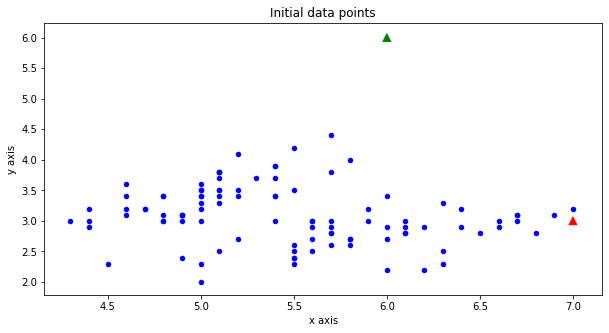

In [8]:
colors = ['r', 'g']
fig, ax = plt.subplots(figsize=(10,5))
plt.title("Initial data points") 
plt.xlabel("x axis") 
plt.ylabel("y axis") 
plt.scatter(Data[:,0],Data[:,1], c='Blue', s=20)
plt.scatter(Initial_centroids[:,0], Initial_centroids[:,1], marker='^', s=60, c=['r', 'g'])
plt.show()

## Kmeans and updating clusters

In [9]:
number_clusters = 2
while  e != 0:
    for i in range(len(Data)):
        distances = Euclidean(Data[i], Initial_centroids)
        cluster = np.argmin(distances)
        clusters[i] = cluster
    Centroid_old = deepcopy(Initial_centroids)
    for i in range(number_clusters):
        points = [Data[j] for j in range(len(Data)) if clusters[j] == i]
        Initial_centroids[i] = np.mean(points, axis=0)
    e = Euclidean(Initial_centroids, Centroid_old, None)


## Plotting the data with final centroids    

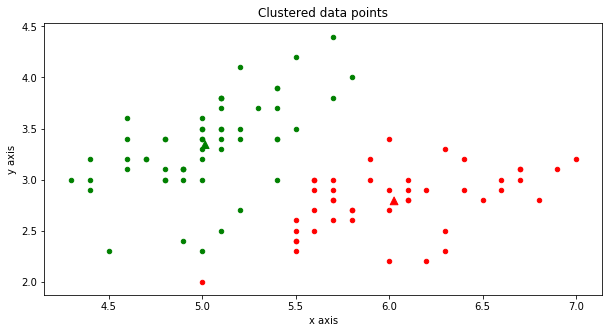

In [10]:
colors = ['r', 'g']
fig, ax = plt.subplots(figsize=(10,5))
for i in range(number_clusters):
    plt.title("Clustered data points") 
    plt.xlabel("x axis") 
    plt.ylabel("y axis") 
    points = np.array([Data[j] for j in range(len(Data)) if clusters[j] == i])
    ax.scatter(points[:, 0], points[:, 1], s=20, c=colors[i])
ax.scatter(Initial_centroids[:, 0], Initial_centroids[:, 1], marker='^', s=60, c=['r', 'g'])
plt.show()


In [11]:
print("Final centroids are:")
print(Centroid_old)

Final centroids are:
[[6.02666667 2.79111111]
 [5.01636364 3.34181818]]


In [12]:
a = Centroid_old[0][0]
b = Centroid_old[0][1]
c = Centroid_old[1][0]
d = Centroid_old[1][1]


def Cost_function(p, c):
    return (pow(p[0]-c[0],2) + pow(p[1]-c[1],2))
j = 0
for i in range(0,len(clusters)):
    if(clusters[i] == 0):
        points = (Data[i,0],Data[i,1])
        centre = (a,b)
        j+=Cost_function(points,centre)
    else:
        points = (Data[i,0],Data[i,1])
        centre = (c,d)
        j+=Cost_function(points,centre)
j=j/len(Data)  



In [13]:
print("\nValue of J is:",j)


Value of J is: 0.30433535353535357
